# SCC0270 - Neural Networks and Deep Learning
## Third Practical Project
### Student: Eduardo Amaral
### NUSP: 11735021
#### [Project Description](https://github.com/rolimans/scc0270-p3/blob/main/projectDescription.pdf)



## Project Setup

#### Importing the necessary libraries



In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Downloading The Simpsons' train and test image dataset

In [2]:
!rm -rf data
!mkdir data
!wget https://github.com/rolimans/scc0270-p3/raw/main/compressedData/data.zip -O data/data.zip -q
!unzip -q data/data.zip -d data
!rm -f data/data.zip

## Question 1

You shall create the following CNN using Keras:

- **Convolutional** part of the **MobileNetV2** network
  - This model has to be configured to receive 128x128 RGB images as input
  - All parameters (weights and bias) of this part of the model have to be **"frozen"** (should not update)
  - The parameters of this part of the model have to be obtained from the model pre-trained on ImageNet
- One dense layer with **softmax** activation

And configure your optimization process to use:

- Adam Optimizer
- Cross-entropy as loss
- Accuracy as success metric

Tips:

1. Use one layer of the **Flatten** type to transform the output from the convolutional part of the model into a vector
2. Use the parameter **input_shape** to configure the size of the input image
3. Use the **trainable** property of the **convolutional layers** to freeze them

In [3]:
nClasses = len(os.listdir('data/dataset/train'))
print(f'Number of classes: {nClasses}')

Number of classes: 7


In [4]:
baseModel = MobileNetV2(include_top=False, weights='imagenet', input_shape=(128, 128, 3))

for layer in baseModel.layers:
    layer.trainable = False

flatten = Flatten()(baseModel.output)
dense = Dense(nClasses, activation='softmax')(flatten)

model = Model(inputs=baseModel.input, outputs=dense)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 64, 64, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 64, 64, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 64, 64, 32)   0           ['bn_Conv1[0][0]']           

As we can see, there are only $143,367$ out of the $2,401,351$ parameters that are trainable, and they all belong to the final **Dense** layer, just as we desired

## Question 2

Train the model using the following protocol:

- Allow the training data (**only the training data**) to be distorted using the following transformations:

  - horizontal_flip=True
  - zoom_range=0.2
  - shear_range=10
  - height_shift_range=0.1
  - width_shift_range=0.1

- Use a mini-batch of 32 images

- The model has to be trained for 10 epochs (that means, it should process during the training a quantity equal to 10 times the size of the training dataset)

Take notes of the accuracy of the model on the training data and on the test dataset after each epoch

Tips:

1. **Apply the pre-processing function** used by **MobileNetV2**
2. Use **two different** **ImageDataGenerator** making it so only the training dataset has data augmentation
3. When using the function `flow_from_directory` on the test dataset, use **shuffle=False**

In [5]:
dataGenTrain = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    horizontal_flip=True,
    zoom_range=0.2,
    shear_range=10,
    height_shift_range=0.1,
    width_shift_range=0.1
)

dataGenTest = ImageDataGenerator(preprocessing_function=preprocess_input)


trainGenerator = dataGenTrain.flow_from_directory(
    'data/dataset/train',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    seed=42
)

testGenerator = dataGenTest.flow_from_directory(
    'data/dataset/test',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


Found 2284 images belonging to 7 classes.
Found 1400 images belonging to 7 classes.


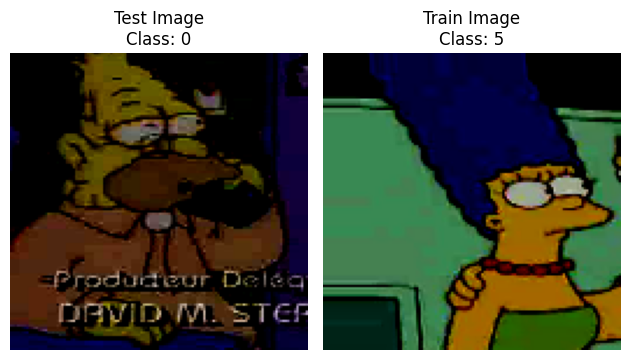

In [6]:
xTest, yTest = testGenerator[0]
xTest = xTest[0]
yTest = yTest[0]

xTrain, yTrain = trainGenerator[2]
xTrain = xTrain[2]
yTrain = yTrain[2]


plt.subplot(1, 2, 1)
plt.imshow(xTest)
plt.axis("off")
plt.title(f"Test Image\nClass: {np.argmax(yTest)}")

plt.subplot(1, 2, 2)
plt.imshow(xTrain)
plt.axis("off")
plt.title(f"Train Image\nClass: {np.argmax(yTrain)}")

plt.tight_layout()
plt.show()

In [7]:
trainedHistory = model.fit(
    trainGenerator,
    epochs=10,
    validation_data=testGenerator
)

Epoch 1/10
72/72 [==============================] - 25s 265ms/step - loss: 1.1483 - accuracy: 0.7583 - val_loss: 0.5909 - val_accuracy: 0.8743
Epoch 2/10
72/72 [==============================] - 17s 231ms/step - loss: 0.5483 - accuracy: 0.8743 - val_loss: 0.6926 - val_accuracy: 0.8450
Epoch 3/10
72/72 [==============================] - 17s 234ms/step - loss: 0.4592 - accuracy: 0.9011 - val_loss: 0.6782 - val_accuracy: 0.8829
Epoch 4/10
72/72 [==============================] - 19s 269ms/step - loss: 0.4083 - accuracy: 0.9173 - val_loss: 0.6401 - val_accuracy: 0.8793
Epoch 5/10
72/72 [==============================] - 18s 251ms/step - loss: 0.2687 - accuracy: 0.9396 - val_loss: 0.5948 - val_accuracy: 0.8936
Epoch 6/10
72/72 [==============================] - 17s 232ms/step - loss: 0.2424 - accuracy: 0.9461 - val_loss: 0.5386 - val_accuracy: 0.9071
Epoch 7/10
72/72 [==============================] - 18s 242ms/step - loss: 0.3807 - accuracy: 0.9321 - val_loss: 0.9473 - val_accuracy: 0.8650

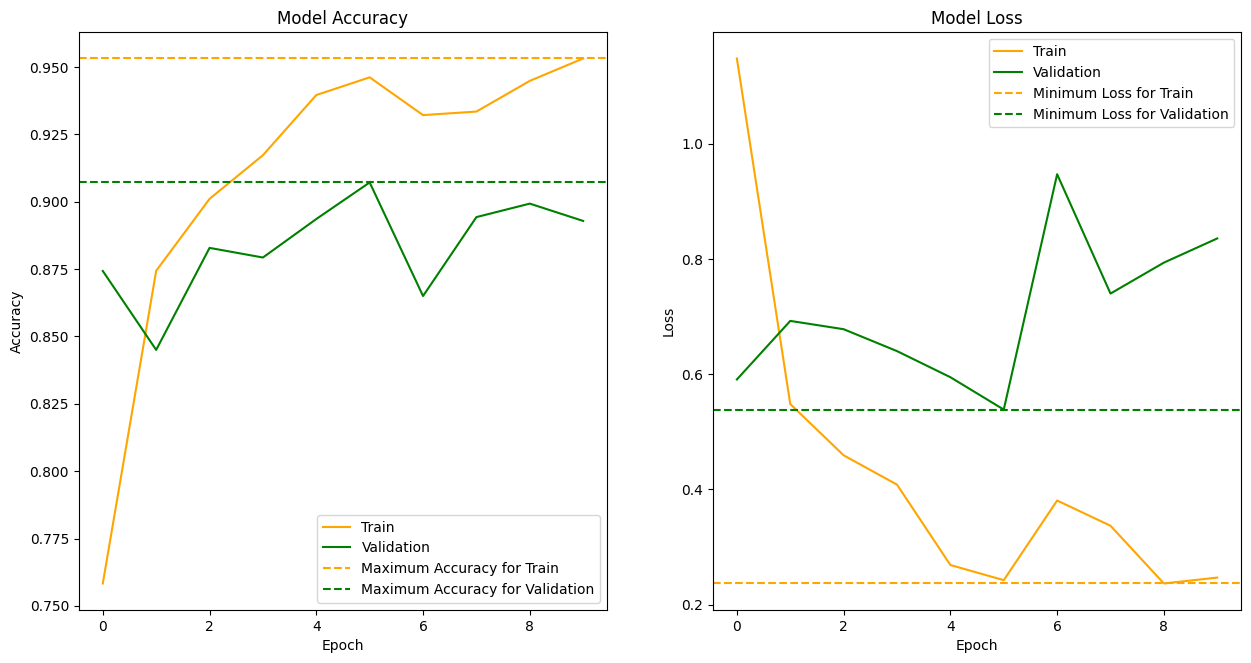

In [8]:
history = trainedHistory.history

fig, axs = plt.subplots(1,2, figsize=(15,7.5))

axs[0].plot(history['accuracy'], color='orange',label='Train')
axs[0].plot(history['val_accuracy'], color='g', label='Validation')

axs[0].set_title('Model Accuracy')
axs[0].set_ylabel('Accuracy')
axs[0].set_xlabel('Epoch')

maxAccTrain = np.max(history['accuracy'])
maxAccVal = np.max(history['val_accuracy'])
axs[0].axhline(y=maxAccTrain, color='orange', linestyle='--', label="Maximum Accuracy for Train")
axs[0].axhline(y=maxAccVal, color='g', linestyle='--', label="Maximum Accuracy for Validation")

axs[0].legend()


axs[1].plot(history['loss'], color='orange', label='Train')
axs[1].plot(history['val_loss'], color='g', label='Validation')

axs[1].set_title('Model Loss')
axs[1].set_ylabel('Loss')
axs[1].set_xlabel('Epoch')

mimLossTrain = np.min(history['loss'])
mimLossVal = np.min(history['val_loss'])
axs[1].axhline(y=mimLossTrain, color='orange', linestyle='--', label="Minimum Loss for Train")
axs[1].axhline(y=mimLossVal, color='g', linestyle='--', label="Minimum Loss for Validation")

axs[1].legend()

plt.show()

After observing the training and validation loss and accuracy we can notice a few things:
1. We achieve very high results of **accuracy** in both datasets, wich proves the transfer learning strategy worked.
2. The **accuracy** does not always increase with each epoch. In this example, the highest achieved **accuracy** for the validation set was not in the last epoch.
3. The **loss** does not always decrease with each epoch. In this example, the lowest achieved **loss** for the validation set was not in the last epoch.
4. A weird observation is that the **loss** for the validation set of the last epoch was higher than the one of the first epoch

In [9]:
finalModelAccuracy = model.evaluate(testGenerator)[1]
print(f'The final model Accuracy on Test Data is: {finalModelAccuracy:.2}')

44/44 [==============================] - 4s 88ms/step - loss: 0.8358 - accuracy: 0.8929
The final model Accuracy on Test Data is: 0.89


Here is a practical example of use of the model:

1/1 [==============================] - 0s 27ms/step


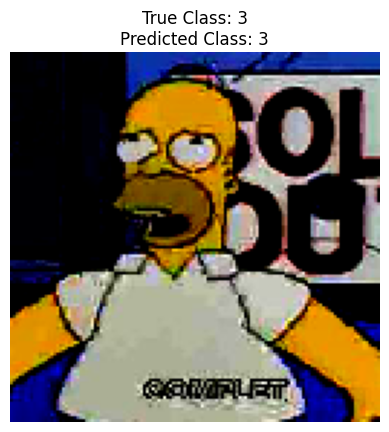

In [14]:
xRand, yRand = testGenerator[np.random.randint(0,len(testGenerator))]
idx = np.random.randint(0,len(xRand))
xRand = xRand[idx]
yRand = yRand[idx]

prediction = model.predict(np.expand_dims(xRand, axis=0))[0]

trueClass = np.argmax(yRand)
predClass = np.argmax(prediction)

plt.imshow(xRand)
plt.title(f'True Class: {trueClass}\nPredicted Class: {predClass}')
plt.axis('off')
plt.show()
